<a href="https://colab.research.google.com/github/khuongduying/dataviz/blob/main/SurvivalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# survminer: Survival Analysis and Visualization

## Installation and loading

In [1]:
install.packages("survminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’




In [2]:
library("survminer")

Loading required package: ggplot2

Loading required package: ggpubr



## ggsurvplot: Drawing survival curves

### Fitting survival curves

In [3]:
require("survival")
fit <- survfit(Surv(time, status) ~ sex, data = lung)

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:survminer’:

    myeloma




In [19]:
fit

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

        n events median 0.95LCL 0.95UCL
sex=1 138    112    270     212     310
sex=2  90     53    426     348     550

In [8]:
head(lung)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


### Basic plots

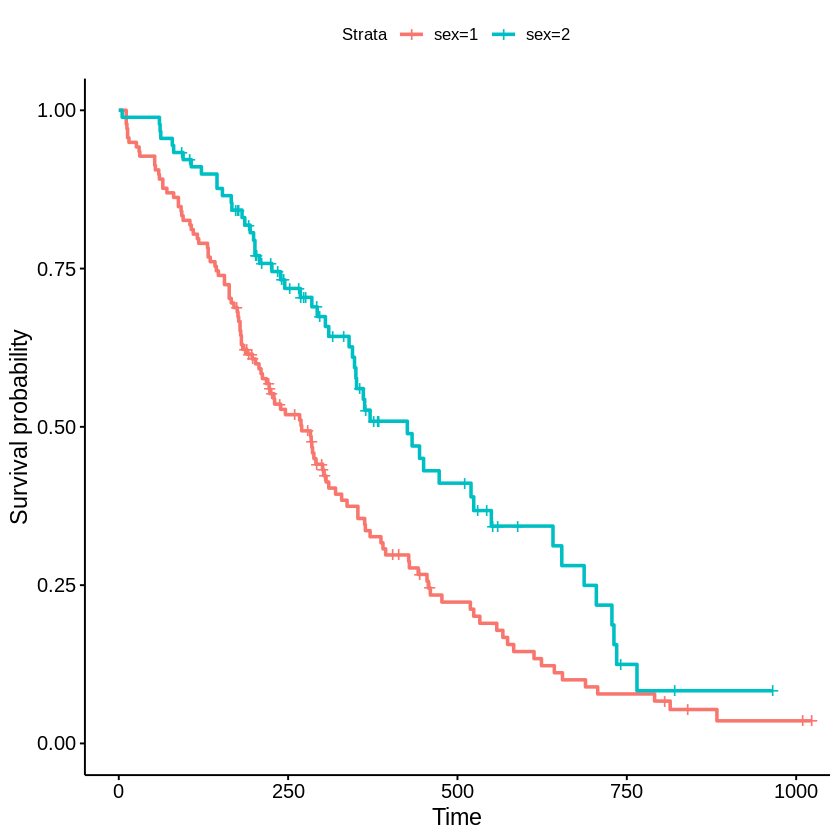

In [14]:
ggsurvplot(fit, data=lung)

Censor shape can be changed as follow:

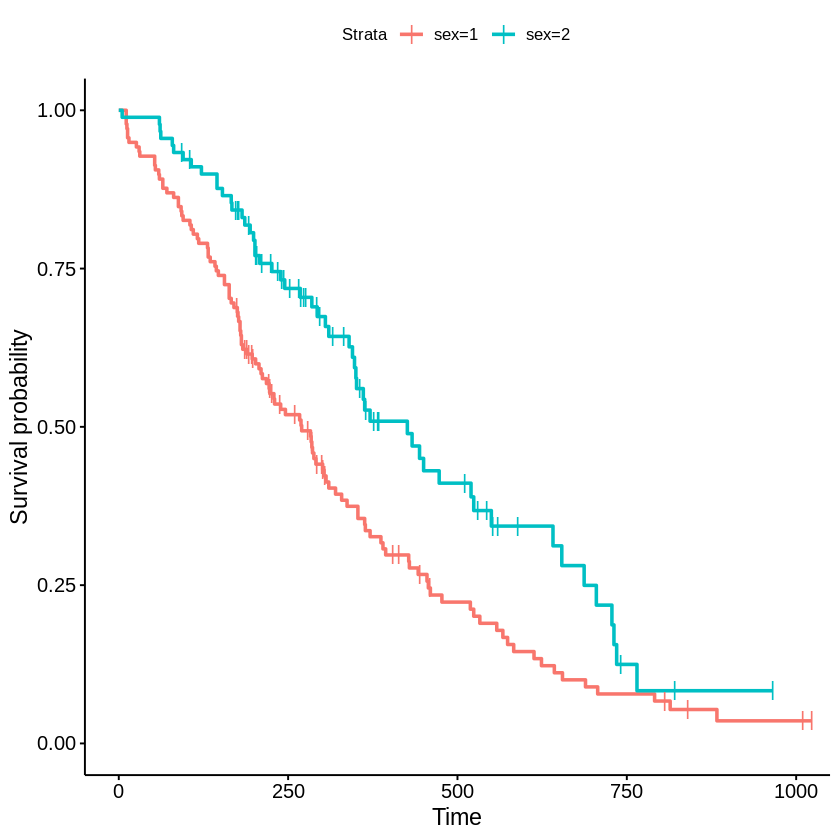

In [15]:
ggsurvplot(fit, data=lung,
          censor.shape="|",
          censor.size=4)

### Customized survival curves

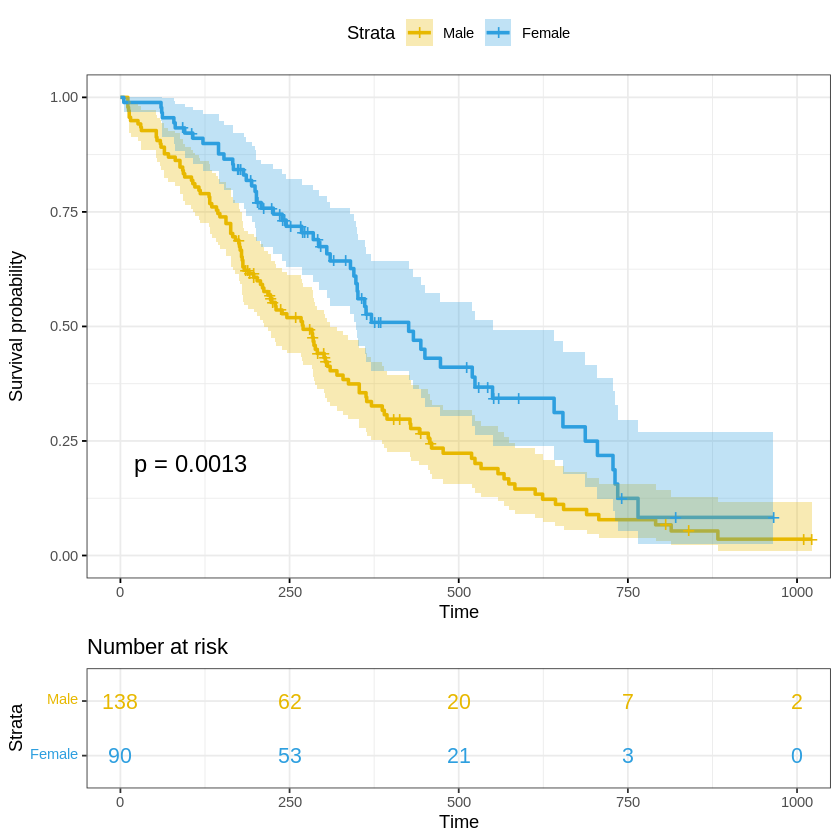

In [17]:
ggsurvplot(
  fit,
  data = lung,
  size = 1,                   # change line size
  palette =
    c("#E7B800", "#2E9FDF"), # custom color palettes
  conf.int = TRUE,            # Add confidence interval
  pval = TRUE,                # Add p-value
  risk.table = TRUE,          # Add risk table
  risk.table.col = "strata",  # Risk table color by groups
  legend.labs =
    c("Male", "Female"),      # Change legend labels
  risk.table.height = 0.25,   # Useful to change when you have multiple groups
  ggtheme = theme_bw()        # Change ggplot2 them
)

Note that, additional arguments are available to customize the main title, axis labels, the font style, axis limits, legends and the number at risk table

## More customized survival curves

Focus on `xlim` and `break.time.by` parameters which do not change the calculations of estimates of survival surves.

Also note `risk.table.y.text.col = TRUE` and `risk.table.y.text = FALSE` that provide bars instead of names in the text annotations of the legend of risk table.

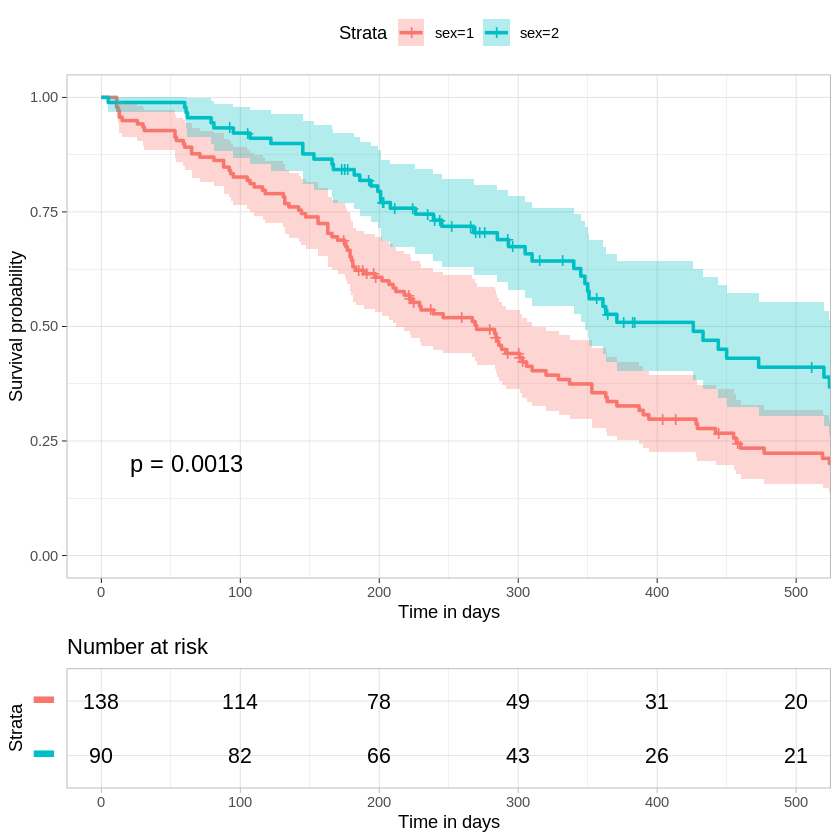

In [18]:
ggsurvplot(
  fit,
  data = lung,
  risk.table = TRUE,
  pval = TRUE,
  conf.int = TRUE,
  xlim = c(0,500),       # present narrower X axis, but not effect
                         # survival estimates.
  xlab = "Time in days", # customize X axis label.
  break.time.by = 100,   # break X aixs in time intervals by 500.
  ggtheme = theme_light(),
  risk.table.y.text.col = T, # colour risk table text annotations.
  risk.table.y.text = FALSE # show bars instead of names in text annotaions
                          # in legend of risk table
)

### Uber customized survival curves